In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

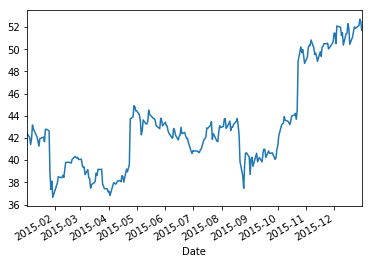

In [3]:
pricing_sample= pdr.data.DataReader('MSFT', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
returns_sample = pricing_sample.pct_change()[1:]
pricing_sample.plot()

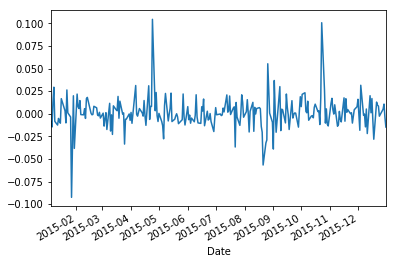

In [6]:
returns_sample.plot()

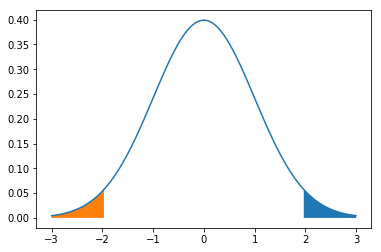

In [12]:
x = np.linspace(-3, 3,100)
y = stats.norm(0,1).pdf(x)

fig, ax = plt.subplots(1,1,sharex=True)
ax.plot(x,y)
ax.fill_between(x,0,y, where=x > 1.96)
ax.fill_between(x,0,y, where=x <-1.96)



In [17]:
stats.ttest_1samp(returns_sample, 0)

Ttest_1sampResult(statistic=0.8411241732919857, pvalue=0.40108217327775997)

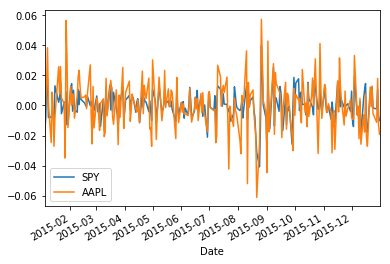

In [22]:
a= pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
a_r = a.pct_change()[1:]
b= pdr.data.DataReader('AAPL', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
b_r = b.pct_change()[1:]

combined = pd.concat([a_r, b_r], axis=1)
combined.columns = ['SPY', 'AAPL']

combined.plot()

In [30]:
stats.ttest_ind(a_r, b_r, equal_var=False)

Ttest_indResult(statistic=0.033032663294526095, pvalue=0.9736649935172769)

In [31]:
from scipy.stats import chi2

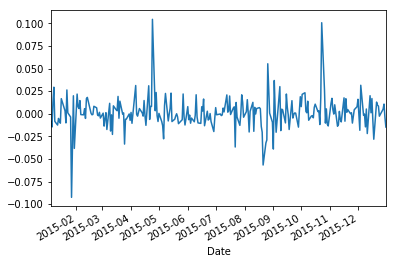

In [33]:
msft= pdr.data.DataReader('MSFT', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
msft_r = msft.pct_change()[1:]

msft_r.plot()

In [35]:
from scipy.stats import chisquare

In [41]:
chisquare(msft_r, 0.0001 )

Power_divergenceResult(statistic=793.8909068838047, pvalue=6.84664051830033e-58)

In [37]:
chi2.ppf(.99, len(msft_r)-1)

304.9395557339572

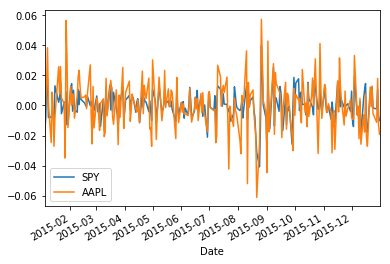

In [42]:
a= pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
a_r = a.pct_change()[1:]
b= pdr.data.DataReader('AAPL', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
b_r = b.pct_change()[1:]


combined = pd.concat([a_r, b_r], axis=1)
combined.columns = ['SPY', 'AAPL']

combined.plot()

In [43]:
combined.std()

SPY     0.009760
AAPL    0.016866
dtype: float64

In [50]:
stats.f_oneway(combined.iloc[:,0], combined.iloc[:,1])

F_onewayResult(statistic=0.0010911568443295312, pvalue=0.9736617223080205)

In [49]:
(combined.iloc[:,0].std()/combined.iloc[:,1].std())**2

0.33490665596400526